<a href="https://colab.research.google.com/github/ErfanZakeri/Artificial-Intelligence/blob/main/Q1-5%20of%20Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1 A

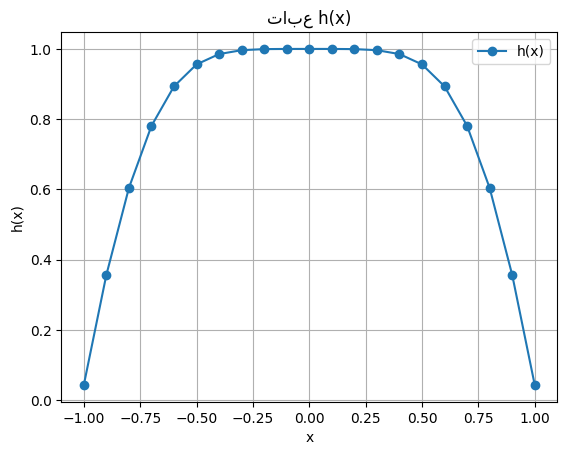

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تعریف صحیح تابع h(x)
def h(x):
    return np.exp(-np.pi * x**2) + x * np.sin(np.pi * x)

# تولید داده‌ها در بازه [-1, 1] با گام 0.1
x = np.arange(-1, 1.01, 0.1)
y = h(x)

# رسم تابع
plt.plot(x, y, 'o-', label='h(x)')
plt.title("تابع h(x)")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.grid(True)
plt.legend()
plt.show()


Q1 B

Epoch 0, MSE: 0.462462
Epoch 50, MSE: 0.011590
Epoch 100, MSE: 0.004466
Epoch 150, MSE: 0.003310
Epoch 200, MSE: 0.003097
Epoch 250, MSE: 0.003043
Epoch 300, MSE: 0.003024
Epoch 350, MSE: 0.003015
Epoch 400, MSE: 0.003009
Epoch 450, MSE: 0.003006


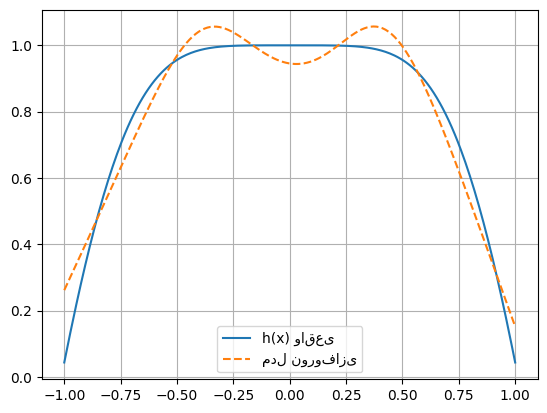

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تابع هدف
def h(x):
    return np.exp(-np.pi * x**2) + x * np.sin(np.pi * x)

x_data = np.linspace(-1, 1, 300)
y_data = h(x_data)

# توابع عضویت گوسی
def gaussian(x, c, sigma):
    return np.exp(-0.5 * ((x - c) / sigma)**2)

# پارامترها
centers = np.array([-0.7, 0.0, 0.7])
sigmas = np.array([0.3, 0.3, 0.3])
a = np.random.randn(3)
b = np.random.randn(3)

# آموزش با گرادیان نزولی
lr = 0.01
epochs = 500

for epoch in range(epochs):
    total_loss = 0
    for i in range(len(x_data)):
        x = x_data[i]
        y_true = y_data[i]

        mus = gaussian(x, centers, sigmas)
        y_rules = a * x + b
        y_pred = np.sum(mus * y_rules) / np.sum(mus)
        error = y_pred - y_true
        total_loss += error**2

        for j in range(3):
            dL_dy = 2 * error
            dyj = mus[j] / np.sum(mus)
            a[j] -= lr * dL_dy * dyj * x
            b[j] -= lr * dL_dy * dyj * 1

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, MSE: {total_loss / len(x_data):.6f}")

# پیش‌بینی نهایی
predictions = []
for x in x_data:
    mus = gaussian(x, centers, sigmas)
    y_rules = a * x + b
    y_pred = np.sum(mus * y_rules) / np.sum(mus)
    predictions.append(y_pred)

# رسم
plt.plot(x_data, y_data, label="h(x) واقعی")
plt.plot(x_data, predictions, '--', label="مدل نوروفازی")
plt.legend()
plt.grid(True)
plt.show()


Q2


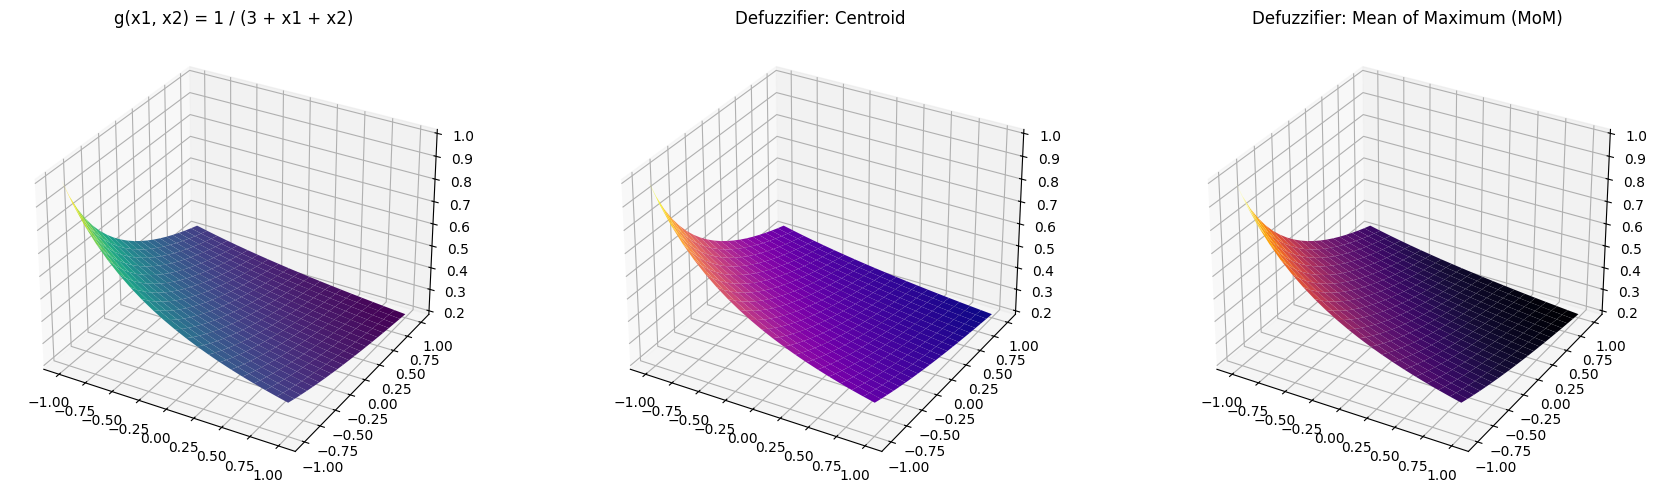

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تابع درست‌شده g(x1, x2) = 1 / (3 + x1 + x2)
def g(x1, x2):
    return 1 / (3 + x1 + x2)

# ساخت مش دوبعدی در بازه [-1, 1] با گام 0.1
x1 = np.arange(-1, 1.1, 0.1)
x2 = np.arange(-1, 1.1, 0.1)
X1, X2 = np.meshgrid(x1, x2)
Y_true = g(X1, X2)

# تابع عضویت مثلثی
def triangular(x, a, b, c):
    return np.maximum(0, np.minimum((x - a)/(b - a), (c - x)/(c - b)))

# مراکز توابع عضویت و عرض مثلث
centers = [-0.7, 0.0, 0.7]
width = 0.7

# تابع فازی‌سازی برای یک مقدار
def fuzzify(x, centers):
    return np.array([triangular(x, c - width, c, c + width) for c in centers])

# خروجی سیستم فازی با دو نوع defuzzifier
Z_centroid = np.zeros_like(Y_true)
Z_mom = np.zeros_like(Y_true)

# محاسبه خروجی‌ها با سیستم فازی
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x1_val = X1[i, j]
        x2_val = X2[i, j]

        mu_x1 = fuzzify(x1_val, centers)
        mu_x2 = fuzzify(x2_val, centers)

        weights = []
        outputs = []

        for m in range(3):
            for n in range(3):
                w = mu_x1[m] * mu_x2[n]
                y_rule = g(x1_val, x2_val)
                weights.append(w)
                outputs.append(y_rule)

        weights = np.array(weights)
        outputs = np.array(outputs)

        # defuzzifier نوع Centroid
        if np.sum(weights) != 0:
            Z_centroid[i, j] = np.sum(weights * outputs) / np.sum(weights)
        else:
            Z_centroid[i, j] = 0

        # defuzzifier نوع MoM (میانگین مقادیر بیشینه)
        max_w = np.max(weights)
        Z_mom[i, j] = np.mean(outputs[weights == max_w])

# رسم نمودارهای سطحی
fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X1, X2, Y_true, cmap='viridis')
ax1.set_title('g(x1, x2) = 1 / (3 + x1 + x2)')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X1, X2, Z_centroid, cmap='plasma')
ax2.set_title('Defuzzifier: Centroid')

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X1, X2, Z_mom, cmap='inferno')
ax3.set_title('Defuzzifier: Mean of Maximum (MoM)')

plt.tight_layout()
plt.show()


Q3

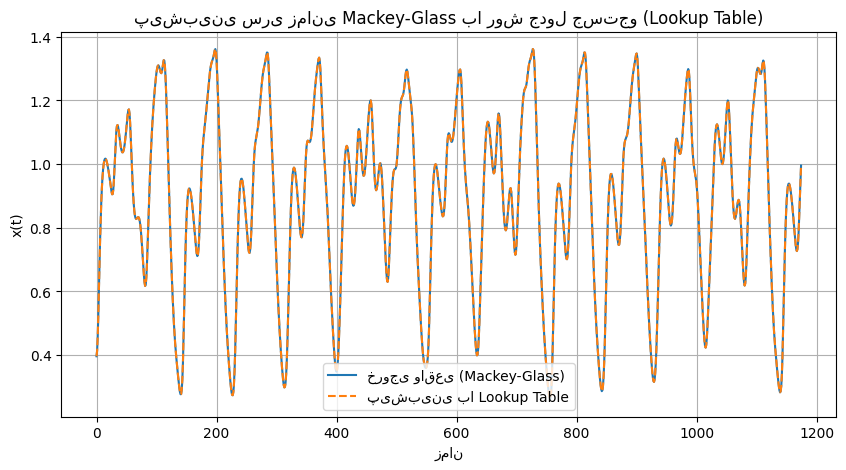

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# تابع تولید سری زمانی Mackey-Glass
# -------------------------------
def mackey_glass(T=1200, tau=25, beta=0.2, gamma=0.1, n=10, dt=1.0, x0=1.2):
    steps = int(T / dt)
    history = np.zeros(steps + tau + 1)
    history[:tau+1] = x0  # مقدار اولیه

    for t in range(tau+1, steps+tau+1):
        xtau = history[t - tau]
        history[t] = history[t-1] + dt * (beta * xtau / (1 + xtau**n) - gamma * history[t-1])

    return history[tau:]

# -------------------------------
# ساخت جدول جستجو (X: ورودی t-τ ، Y: خروجی t)
# -------------------------------
data = mackey_glass()
tau = 25
X = []
Y = []

for t in range(tau, len(data) - 1):
    X.append(data[t - tau])
    Y.append(data[t])

X = np.array(X)
Y = np.array(Y)

# -------------------------------
# تابع جستجو در جدول (نزدیک‌ترین همسایه)
# -------------------------------
def lookup_predict(x, X_table, Y_table):
    idx = np.argmin(np.abs(X_table - x))  # نزدیک‌ترین ورودی
    return Y_table[idx]

# -------------------------------
# پیش‌بینی خروجی‌ها با جدول جستجو
# -------------------------------
predicted = []
for i in range(len(X)):
    pred = lookup_predict(X[i], X, Y)
    predicted.append(pred)

# -------------------------------
# رسم نتیجه
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(Y, label="خروجی واقعی (Mackey-Glass)")
plt.plot(predicted, label="پیش‌بینی با Lookup Table", linestyle='dashed')
plt.xlabel("زمان")
plt.ylabel("x(t)")
plt.title("پیش‌بینی سری زمانی Mackey-Glass با روش جدول جستجو (Lookup Table)")
plt.legend()
plt.grid(True)
plt.show()


Q4

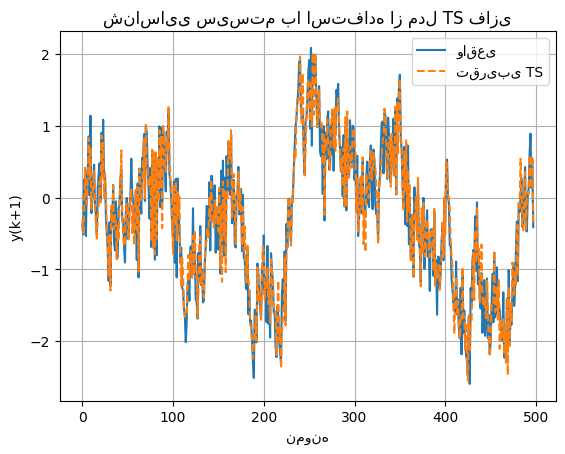

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# گام اول: تولید داده‌های ورودی و خروجی بر اساس معادلات داده‌شده
def g(u):
    return 0.6 * np.sin(np.pi * u) + 0.3 * np.sin(3 * np.pi * u) + 0.1 * np.sin(5 * np.pi * u)

N = 500
u = np.random.uniform(-1, 1, N)
y = np.zeros(N)

# مقداردهی اولیه برای y(0) و y(1)
y[0] = 0
y[1] = 0

for k in range(2, N):
    y[k] = 0.3 * y[k-1] + 0.6 * y[k-2] + g(u[k-1])

# گام دوم: ساخت داده آموزشی برای سیستم TS
X = np.vstack((u[1:-1], y[1:-1], y[0:-2])).T
Y = y[2:]

# تعریف تعداد قوانین و مراکز
n_rules = 3
centers = np.linspace(-1, 1, n_rules)
sigma = 0.5

# توابع عضویت گاوسی برای u
def gaussmf(x, c, sigma):
    return np.exp(-((x - c) ** 2) / (2 * sigma ** 2))

# گام سوم: پیاده‌سازی سیستم TS با f(x) داده‌شده در صورت سوال (رابطه 3)
def TS_fuzzy(X, centers, sigma, params):
    N = X.shape[0]
    y_pred = np.zeros(N)
    for i in range(N):
        w = np.array([gaussmf(X[i, 0], c, sigma) for c in centers])
        w_sum = np.sum(w)
        rules_output = np.array([np.dot(params[j], X[i]) for j in range(len(centers))])
        y_pred[i] = np.dot(w, rules_output) / w_sum
    return y_pred

# گام چهارم: یادگیری پارامترهای خطی برای هر قانون با کمترین مربعات
params = []
for j, c in enumerate(centers):
    w = gaussmf(X[:, 0], c, sigma)
    W = np.diag(w)
    theta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ Y)
    params.append(theta)

# گام پنجم: پیش‌بینی خروجی مدل TS
y_est = TS_fuzzy(X, centers, sigma, params)

# گام ششم: نمایش نتایج
plt.plot(Y, label="واقعی")
plt.plot(y_est, '--', label="تقریبی TS")
plt.legend()
plt.title("شناسایی سیستم با استفاده از مدل TS فازی")
plt.grid(True)
plt.xlabel("نمونه")
plt.ylabel("y(k+1)")
plt.show()


Q5

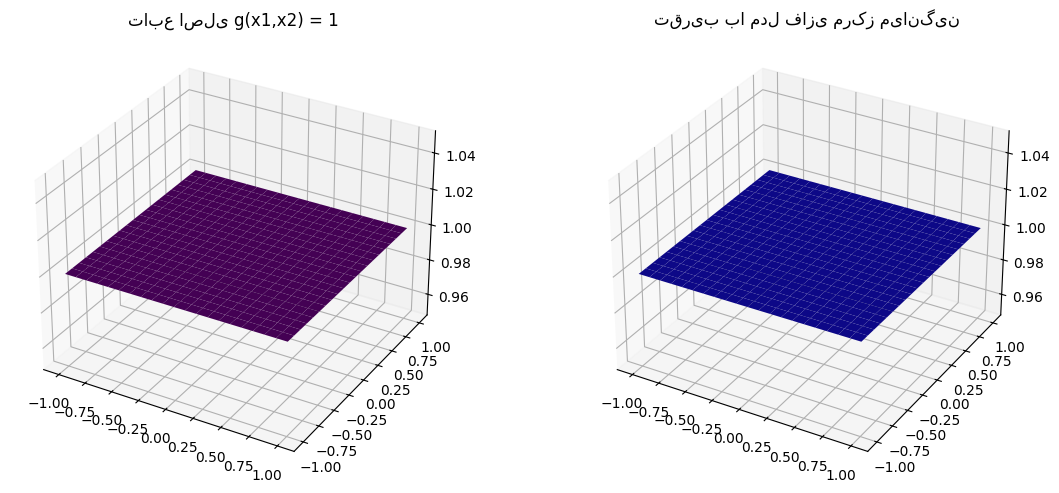

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# تولید داده‌ها در دامنه [-1, 1] x [-1, 1]
x1 = np.arange(-1, 1.1, 0.1)
x2 = np.arange(-1, 1.1, 0.1)
X1, X2 = np.meshgrid(x1, x2)

# تابع واقعی
g_true = np.ones_like(X1)

# تابع عضویت گاوسی (برای مرکز میانگین)
def gaussmf(x, c, sigma):
    return np.exp(-((x - c)**2) / (2 * sigma**2))

# مراکز قوانین فازی (برای هر ورودی)
centers = [-1, 0, 1]
sigma = 0.5

# مقدار خروجی هر قانون (همه برابر 1 چون g=1)
z = np.ones((len(centers), len(centers)))

# مدل فازی مرکز میانگین
g_fuzzy = np.zeros_like(X1)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x_1 = X1[i, j]
        x_2 = X2[i, j]

        w_total = 0
        output_total = 0

        for m, c1 in enumerate(centers):
            for n, c2 in enumerate(centers):
                w1 = gaussmf(x_1, c1, sigma)
                w2 = gaussmf(x_2, c2, sigma)
                w = w1 * w2

                output_total += w * z[m, n]
                w_total += w

        g_fuzzy[i, j] = output_total / w_total if w_total != 0 else 0

# رسم تابع واقعی و تقریب فازی
fig = plt.figure(figsize=(12, 5))

# سطح واقعی
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X1, X2, g_true, cmap='viridis')
ax1.set_title("تابع اصلی g(x1,x2) = 1")

# تقریب فازی
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X1, X2, g_fuzzy, cmap='plasma')
ax2.set_title("تقریب با مدل فازی مرکز میانگین")

plt.tight_layout()
plt.show()
